In [8]:
import numpy as np
import matplotlib.pyplot as plt


def read_bin(file_path, size):
  with open(file_path, 'rb') as file:
    data = np.fromfile(file, dtype=np.uint8, count=size * size)
    return np.reshape(data, (size, size))

def pltshow(subplot, data, title, fontsize=12):
    plt.subplot(subplot[0], subplot[1], subplot[2])
    plt.imshow(data, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(title, fontsize=fontsize)

In [9]:
def apply_filters_and_display(input_file, size, w_size):
    w_sizeo2 = w_size // 2

    W = np.zeros((w_size, w_size))
    yMF = np.zeros((size, size))
    yE = np.zeros((size, size))
    yD = np.zeros((size, size))
    yO = np.zeros((size, size))
    yC = np.zeros((size, size))

    x = read_bin(input_file, size)

    for row in range(w_sizeo2, size - w_sizeo2):
        for col in range(w_sizeo2, size - w_sizeo2):
            W = x[row - w_sizeo2:row + w_sizeo2 + 1, col - w_sizeo2:col + w_sizeo2 + 1]
            yMF[row, col] = np.median(W)
            yE[row, col] = np.min(W)
            yD[row, col] = np.max(W)

    for row in range(w_sizeo2 + 1, size - w_sizeo2 - 1):
        for col in range(w_sizeo2 + 1, size - w_sizeo2 - 1):
            W = yE[row - w_sizeo2:row + w_sizeo2 + 1, col - w_sizeo2:col + w_sizeo2 + 1]
            yO[row, col] = np.max(W)
            W = yD[row - w_sizeo2:row + w_sizeo2 + 1, col - w_sizeo2:col + w_sizeo2 + 1]
            yC[row, col] = np.min(W)

    plt.figure(figsize=(12, 6))

    pltshow((2, 2, 1), yO, f"")
    pltshow((2, 2, 2), x, f"3x3 Median Filter")
    pltshow((2, 2, 3), yMF, f"3x3 Morphological Opening")
    pltshow((2, 2, 4), yC, f"3x3 Morphological Closing")
    
    plt.show()

camera99bin_fp = 'assets/camera99bin.sec'
camera9bin_fp = 'assets/camera9bin.sec'


### camera99bin

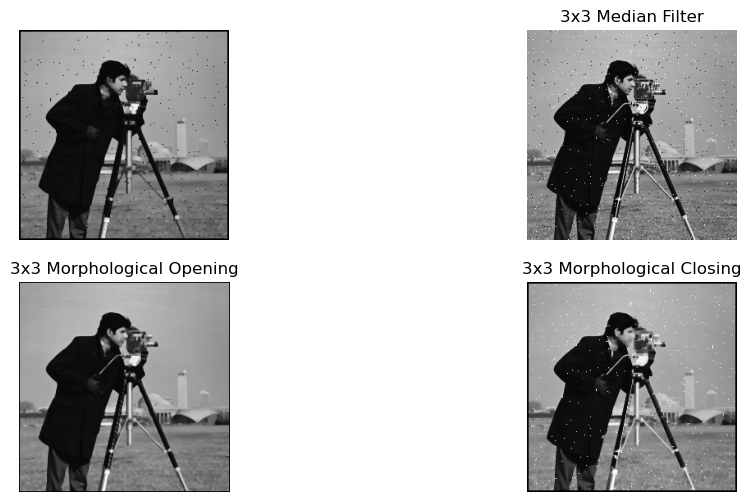

In [11]:
apply_filters_and_display(camera99bin_fp, 256, 3)

### camera9bin

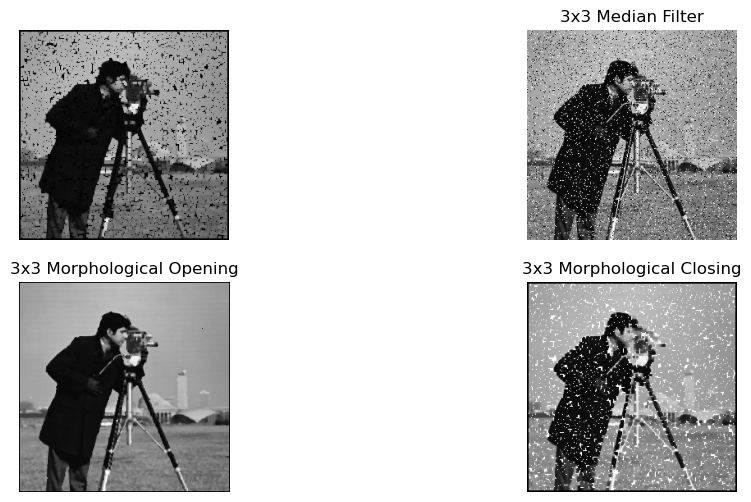

In [12]:
apply_filters_and_display(camera9bin_fp, 256, 3)